In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
years = [2016, 2017]

In [3]:
"""This function modifies a data frame 
by adding a new 'Inconnu' column countinng the number of uncounted participants
by transforming all column into a percentage of all participants number
"""
def create_dataframe(lava_data, participants, label_for_others):
    data = pd.DataFrame(lava_data, index=years)
    data = data.fillna(value=0)
    data['Counted'] = data.sum(axis=1)
    df = pd.concat([data, participants], axis=1)
    df[label_for_others] = df['Participants'] - df['Counted']
    df = df.drop(['Counted', 'Participants'], axis=1)
    cols = df.columns
    df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100).round()
    return df
    

Inputs from http://ironman.com

In [4]:
# nombre de participants total (sera utile pour calculer les pourcentages)
# http://eu.ironman.com/triathlon/coverage/athlete-tracker.aspx?race=worldchampionship&y=201
participants = pd.DataFrame({"Participants":2316, "Participants":2455}, index=years)


Inputs from http://lavamagazine.com/

## Chaussures de couse-à-pied

In [5]:
lava_shoes = [
    {'Asics':17.0, 'Hoka':16, 'Saucony':13, 'Brooks':8, 'New Balance':8, 
     'Newton':8, 'Adidas':7, 'Nike':6, 'Mizuno':5, 'On':4, 
     'Zoot':3, 'Skechers':2, 'Altra':2, 'Others':1},
    {'Hoka':18.1, 'Saucony':12.6, 'Asics': 12.4, 'Brooks':8.5, 'New Balance':8.0, 
     'Adidas':7.3, 'On':6.9, 'Nike':5.7, 'Newton':5.4, 'Mizuno':4.4, 
     'Skechers':3.7, 'Altra': 2.0, 'Salming':1.3, 'Zoot':1.3, 'Under Armor':0.004, 
     'Puma':0.002, 'Scott':.002, 'Pearl Izumi':0.002, 'Inov-8':0.002, 'Vibram':0.0005, 
     'Kswiss':0.0005, 'Merrel':0.0005, 'Other':0.002}
]

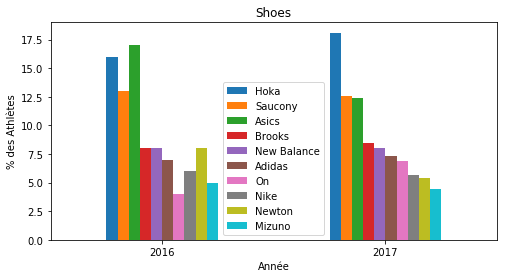

In [6]:
df = pd.DataFrame(lava_shoes, index=years)
df = df.fillna(value=0)

# discard any brand which is not is the top-10 brands
# otherwise, chart will be diffcult to read
top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Shoes', figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Vélos

In [7]:
 lava_bikes = [
    # 2016 count from http://lavamagazine.com/2016bikecount
    {'Cervelo':577, 'Trek':261,'Specialized':209,'Felt':139,'Argon 18':106, 
     'Scott':106, 'BMC':100,'Quintana':89,'Cannondale':80,'Giant':70 },
    # 2017 count from http://lavamagazine.com/2017-ironman-bike-count        
    {'Cervelo':570, 'Trek':261,'Specialized':216,'Felt':177,'Argon 18':146, 
    'Canyon':102, 'BMC':101,'Scott':100,'Giant':88,'Quintana':86
    },
 ]

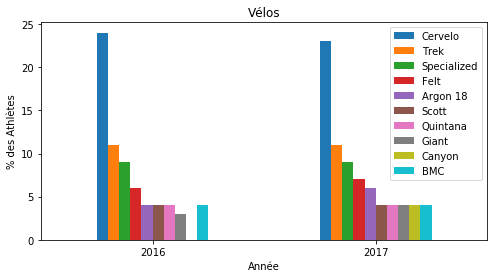

In [8]:
df = create_dataframe(lava_bikes, participants, 'Autres')
df = df.drop('Autres', axis=1)

top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Vélos',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Wearable GPS

In [9]:
# From Lava magazine
lava_gps = [
    {"Garmin":1673, "Polar":85,"Suunto":47,"TomTom":24,"Timex":16,"Fitbit":1}, # 2016
    {"Garmin":1869, "Polar":91,"Suunto":20,"TomTom":9,"Smart Watches":5}       # 2017
]

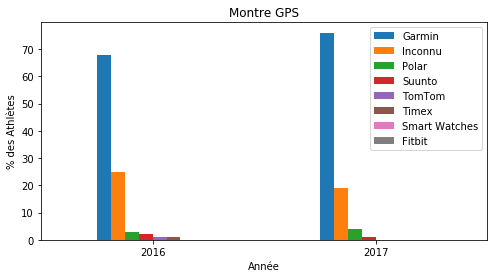

In [10]:
df = create_dataframe(lava_gps, participants, 'Inconnu')

top = df.loc[2017].sort_values(ascending=False).index
df = df[top]

ax = df.plot.bar(title='Montre GPS',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Manchons de compression

In [11]:
lava_compression_socks = [
    # 2014 count from http://lavamagazine.com/2014-hawaii-ironman-compression-legging-count/
    {'Compressport':127, 'Cep':71, '2XU': 45, 'Zoot':11, 'Skins':9, 
     'BV Sport':9, 'SLS3':8, 'Zensah':5, 'Sigvaris':3, 'Ion':3, 
     'Recofit':2, 'Xbionic': 2, 'Orca':2, 'McDavid':1, 'Rocket':1,
     'Ekoi':1, 'Asics': 1, 'Hoka':1, 'Compex':1, 'Sural':1,
     'Salomon':1, '110%': 1, 'Craft':1, 'Autres':13 },
    # 2017 count from http://lavamagazine.com/ironman-compression-count
     {'Compressport':115, 'Cep':19, '2XU': 23, 'Zensah':11, 'Skins':10, 
     'BV Sport':10, 'SLS3':9, 'Zoot':4, 'Nike':2, 'Kalenji':2, 
     'Orca':1, 'Xbionic': 1, 'Mizuno':1, 'Hoko':1, 'Sural':1,
    'Autres': 7} 
]

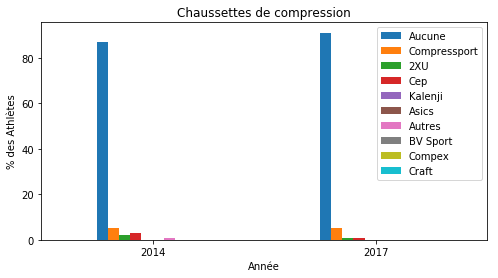

In [12]:
df = create_dataframe(lava_compression_socks, participants, 'Aucune')
df = df.fillna(value=0)

# discard any brand which is not is the top-10 brands
# otherwise, chart will be diffcult to read
top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

# trick to cope with 2014 instead of 2016
df.loc[2014] = df.loc[2016]
df = df.loc[[2014,2017],:]

ax = df.plot.bar(title='Chaussettes de compression', figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Casques

In [13]:
lava_helmets = [
    # 2016 from http://lavamagazine.com/2016bikecount/
    {'Rudy Project':550, 'Giro':438, 'Specialized':280, 'Louis Garneau ':124, 'Casco': 108, 
      'Kask':101, 'Bontrager':78, 'Lazer':63, 'Bell':62, 'Poc':39, 
      'Ekoi':27, 'Catlike': 22, 'MET':17, 'Smith':15, 'UVEX':15,
      'Spuik':15, 'Kabuta':14, 'Scott':12, 'Bolle':12, 'Limar':10,
      'Giant':8, 'Cratoni':6, 'SH+':6, 'Mavic':5, 'Las':5,
      'Kali':4, 'Cannondale':3, 'BBB':3, 'Giant/Liv':3, 'Seluv':3,
      'Vitoria':2, 'Matrix':2,'OGK':1, 'Gray':1, 'ZeroRH':1,
      'Azure':1, 'Briko':1, 'Northwave':1, 'Suomy':1, 'Salice':1,
      'Mizuno':1, 'Avus':1, 'Extreme':1, 'Blade':1, 'Ironman Kuji':1
    },
    # 2017 http://lavamagazine.com/bike-count-helmets-aerobars-hydration-saddles-accessories/
     {'Rudy Project':480, 'Giro':406, 'Casco': 129, 'Specialized':280, 'Kask ':161, 
      'Louis Garneau':116, 'Bontrager':90, 'Lazer':62, 'Poc':43, 'Met':41, 
      'Scott':40, 'Bell': 34, 'Kuboto':24, 'Smith':23, 'Giant/Liv':21,
      'Uvex':20, 'Catlike':20, 'Ekoi':17, 'SH+':16, 'Limar':14,
      'Spuik':12, 'Bolle':6, 'Las':5, 'Sumoy':5, 'Mavic':4,
      'Oakley':3, 'Kali':3, 'Carnac':3, 'Alpina':2, 'Salice':2,
      'Briko':2, 'Tec': 6} 
]

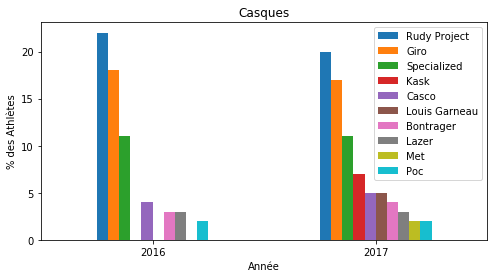

In [14]:
df = create_dataframe(lava_helmets, participants, 'Autres')
df = df.drop('Autres', axis=1)

top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Casques',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Roues

In [15]:
lava_wheels = [
    # 2016 from http://lavamagazine.com/2016bikecount/
    {'Zipp':1887, 'Enve':289, 'Hed':230, 'Reynolds ':215, 'Bontrager': 200, 
      'Mavic':147, 'Shimano':127, 'Roval':120, 'Flo':61, 'Profile Design':60
    },
    # 2017 http://lavamagazine.com/2017-ironman-world-championship-wheel-count/
    {'Zipp':1896, 'Enve':354, 'Hed':259, 'Reynolds ':235, 'Mavic': 200, 
      'Bontrager':160, 'Roval':124, 'Shimano':106, 'Flo':79, 'Vision':75
    }
]

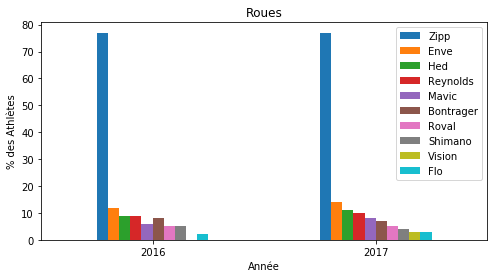

In [16]:
df = create_dataframe(lava_wheels, participants, 'Autres')

top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Roues',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Selles

In [17]:
lava_saddles = [
    # 2016 from http://lavamagazine.com/2016bikecount/
    {'ISM':734, 'Fizik':373, 'Specialized':328, 'Cobb':267, 'Bontrager': 140, 
      'Selle Italia':130, 'Prologo':83, 'SMP':48, 'Dash':27, 'Selle San Marco':25
    },
    # 2017 http://lavamagazine.com/2017-ironman-bike-count/
    {'ISM':828, 'Fizik':359, 'Specialized':307, 'Cobb':221, 'Bontrager': 144, 
      'Prolog':121 , 'Selle Italia':115, 'SMP':31, 'Dash':28, 'Selle San Marco':26
    }
]

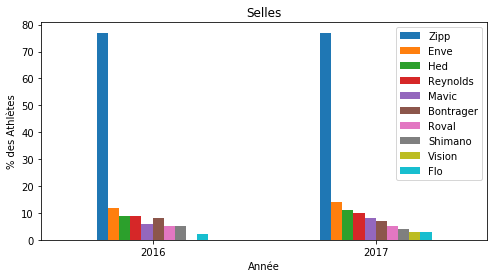

In [18]:
df = create_dataframe(lava_wheels, participants, 'Autres')

top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Selles',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Aéro-bars

In [19]:
lava_aerobars = [
    # 2016 from http://lavamagazine.com/2016bikecount/
    {'3T':433, 'Profile Design':427, 'Bontrager':244, 'Vision':192, 'Specialized': 130, 
      'Zipp':112 , 'Felt Devox':93, 'Argon 18':74, 'Giant/Liv':52, 'Pro':35
    },
    # 2017 http://lavamagazine.com/2017-ironman-bike-count/
    {'Profile Design':667, '3T':391, 'Bontrager':241, 'Vision':154, 'Specialized': 145, 
      'Felt':138 , 'Argon 18':94, 'Zipp':96, 'Giant/Liv':78, 'Canyon Ergon':67,
      'Pro':54 , 'Ene':44, 'Ventum':34, 'Deda Elementi':28, 'Syntace':26,
     'Oval Concepts':23, 'Hed':18, 'TriRig':16, 'Easton':14, 'PlanetX':9,
     'Airstreem':8, 'Blue Aerus': 6, 'Simplon':6, 'Kuota':6, 'Boardman':5,
     'Look':5, 'Road dropbar':7
    }
]

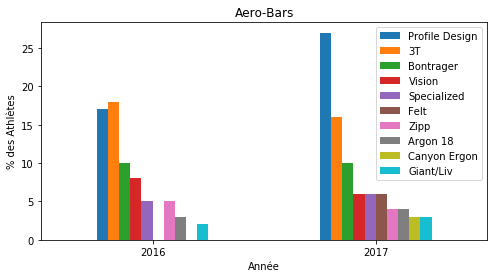

In [20]:
df = create_dataframe(lava_aerobars, participants, 'Autres')

top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Aero-Bars',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Capteurs de puissance

In [21]:
lava_power_meters = [
    # 2016 from http://lavamagazine.com/2016bikecount/
    {'Quarq':303, 'Garmin':228, 'Stages':194, 'PowerTap':175, 'Power2Max':137, 
      'SRM':107 , 'Rotor':89, 'Pioneer':31, 'Polar':4, 'Look':3,
     'Verve':3 , '4iii':3, 'Bpro':2
    },
    # 2017 http://lavamagazine.com/bike-count-components-pedals-powermeters/
    {'Quarq':360, 'Garmin':285, 'Stages':190, 'Power2Max':163, 'Stages':134, 
      'Rotor':108, 'SRM':94, 'Pioneer':59, 'InfoCrank':11, 'Favero':8,
     '4iii':3 , 'Polar':3
    }
]

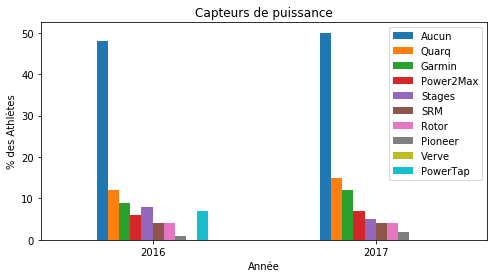

In [22]:
df = create_dataframe(lava_power_meters, participants, 'Aucun')

top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Capteurs de puissance',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Composants

In [23]:
lava_components = [
    # 2016 from http://lavamagazine.com/2016bikecount/
    {'Shimano':1965, 'Sram':353, 'Campagnolo':26, 'Visio':3},
    # 2017 http://lavamagazine.com/bike-count-components-pedals-powermeters/
    {'Shimano':1933, 'Sram':406, 'Campagnolo':25, 'Visio':4}
]

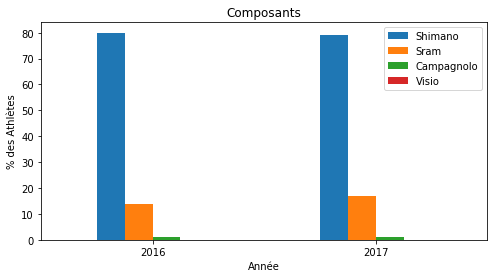

In [24]:
df = create_dataframe(lava_components, participants, 'Aucun')
df = df.drop('Aucun', axis=1)
top = df.loc[2017].sort_values(ascending=False).index
df = df[top]

ax = df.plot.bar(title='Composants',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Systèmes d'hydratation avant

In [25]:
lava_front_hyadration = [
    # 2016 from http://lavamagazine.com/2016bikecount/
    {'Profile Design':597, 'XLab':574, 'Integrated':125, 'Speedfil':102, 'Torhans':91,
     'Zipp':45,'Bontrager':36,'Jetstream':15,'Shimano Pro':10,'Vision':5,
     'Elite':5,'Nathan':2,'Specialized':2,'Podium Quest':1,'Others':67
    },
    # 2017 http://lavamagazine.com/bike-count-components-pedals-powermeters/
    {'Profile Design':716, 'XLab':533, 'Speedfil':98, 'Torhans':65, 'Zipp':30,
     'Giant':29, 'Bontrager':28,'Vision':27,'Jestream':11, 'Shimano Pro': 9,
     'Elite':3,'Nathan':1,'Cee Gees':1,'Podium Quest':1}
     
]

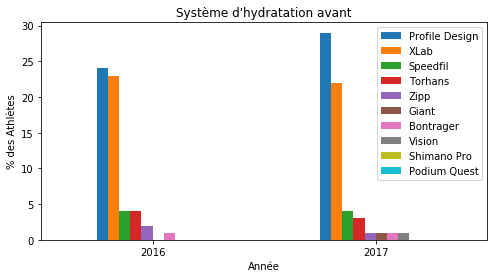

In [26]:
df = create_dataframe(lava_front_hyadration, participants, 'Aucun')
df = df.drop('Aucun', axis=1)
top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Système d\'hydratation avant',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Pédales

In [27]:
lava_pedals = [
    # 2016 from http://lavamagazine.com/2016bikecount/
    {'Shimano':735, 'Look':730, 'Speeplay':368, 'Garmin Vector':228, 'PowerTap':82,
     'Mavic':51,'Time':39,'Keywin':11,'Crank Brothers':3
    },
    # 2017 http://lavamagazine.com/bike-count-components-pedals-powermeters/
    {'Shimano':747.0, 'Look':713, 'Speeplay':349, 'Time':55, 'Others':59
    } 
]

somme=99.0


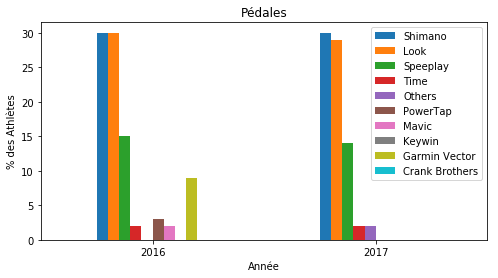

In [28]:
df = create_dataframe(lava_pedals, participants, 'Autres')
somme = df.loc[2017].sum(axis=0)
print("somme="+str(somme))
df = df.drop('Autres', axis=1)
top = df.loc[2017].sort_values(ascending=False).index
df = df[top]

ax = df.plot.bar(title='Pédales',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Porte-bidons arrière

In [29]:
lava_hydration_rear = [
    # 2016 from http://lavamagazine.com/2016bikecount/
    {'XLab':733, 'Profile Design':200, 'Tacx':54, 'Fizik':43, 'Bontrager':24,
     'Mavic':51,'Time':39,'Keywin':11,'Crank Brothers':3
    },
    # 2017 http://lavamagazine.com/bike-count-components-pedals-powermeters/
    {'XLab':733, 'Profile Design':200, 'Tacx':54, 'Fizik':43, 'Bontrager':24,
     'Shimano Pro':24,'Giant':22,'Specialized':21,'Elite':19, 'Vision':17,
     'Speedfil':17, 'Minoura':10, 'Prologo':10, 'Beaker Concepts':8, 'Cobb Cylcing':5,
     'Topeak':2
    } 
]

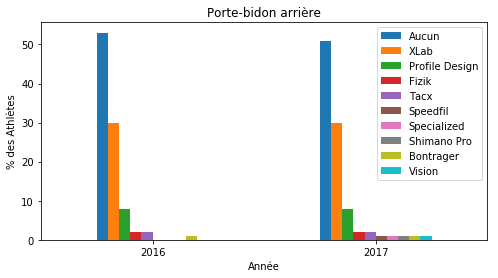

In [30]:
df = create_dataframe(lava_hydration_rear, participants, 'Aucun')
#df = df.drop('Aucun', axis=1)
top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Porte-bidon arrière',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')

## Marque des montres

## Galets de grande dimension

In [31]:
lava_oversized_pulley_wheel = [
    # not available in 2017
    {'Unknown':2455
    } ,
    # 2017 http://lavamagazine.com/bike-count-helmets-aerobars-hydration-saddles-accessories/
    {'Ceramic Speed OSW':267, 'SCYS':9, 'Rider':7, 'Digirit':4, 'Berner':4,
     'Vision':3,'SLF Motion':2,'KCNC':2,'Fouriers':2, 'Jeststream':1,
     'Others':14
    } 
]

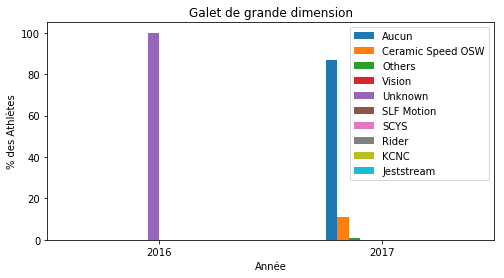

In [32]:
df = create_dataframe(lava_oversized_pulley_wheel, participants, 'Aucun')
#df = df.drop('Aucun', axis=1)
top_10 = df.loc[2017].sort_values(ascending=False).head(10).index
df = df[top_10]

ax = df.plot.bar(title='Galet de grande dimension',figsize=(8, 4), rot=0)
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')